<div style="text-align: center">
<img src="a6_1.png" width="400px" style="display:inline-block"><img src="a6_2.png" width="400px" style="display: inline-block">
</div>

# Plan

1. Getting data from the web
2. Plotting
3. Formatting
4. Plotly
5. The power of Jupyter Notebooks

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
URL = "https://en.wikipedia.org/wiki/World_population" # Wikepedia World Population Page

In [16]:
df = pd.read_html(URL, header=0,index_col=0)[8]

In [17]:
df1 = df[df.columns[0: -2]]

In [18]:
df1.sort_values(by=['2012'], ascending=False)

,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012
Region,,,,,,,,,,,,
World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052
Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250
Africa,86,114,106,106,107,111,133,221,783,973,1022,1052
Europe,168,170,178,190,203,276,408,547,675,732,738,740
Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603
North America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351
Oceania,3,3,3,2,2,2,6,13,30,34,37,38


In [19]:
df1.index.values
new_index = [x.replace("[Note 1]", "") for x in df.index.values]
df1.index = new_index

In [20]:
df1.to_excel("world_population.xlsx")

In [21]:
with open('mytable.tex','w') as tf:
    tf.write(df1.to_latex())

In [22]:
index = df.index.values

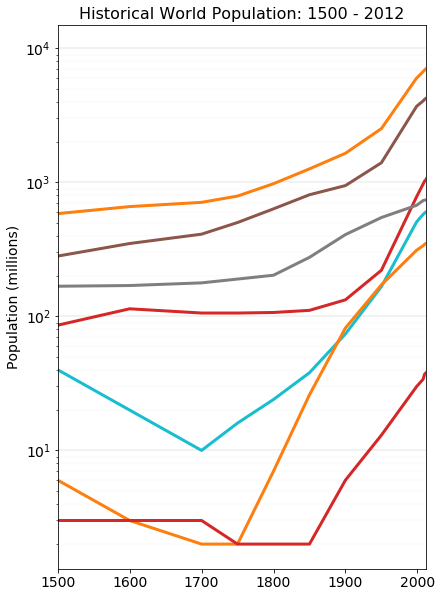

In [32]:
%matplotlib inline

height = 10
width = 0.66*height

fig, ax = plt.subplots(figsize = (width, height))

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

ax.set_yscale('log')

year = df.columns.tolist()
year = list(map(int, year))

#colors = plt.cm.rainbow(np.linspace(0,1,len(df)))

ax.set_title("Historical World Population: 1500 - 2012", fontsize=16)
ax.set_xlim(1500, 2012)
ax.set_ylabel('Population (millions)', fontsize=14)#ax.set_xlabel('Year', fontsize=14)
ax.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax.grid(which='major', linestyle='-', linewidth='0.2', color='grey', axis='y')

for i, row in enumerate(df.iterrows()):
    ax.plot(year, row[1])
    ax.plot(year, row[1], label=row[1].name.replace("[Note 1]", ""), linewidth='3')#, color=colors[i])
    #y_pos = row[1][-3] - 0.5  
    #ax.text(2020, y_pos, row[1].name.replace("[Note 1]", "")+ ", "+str(y_pos), fontsize=14, color=colors[i])

#plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")    
#plt.legend(loc="upper left")

#plt.text(1480, 0.5, "World Population, Wikipedia Article.\n" +
         #"https://en.wikipedia.org/wiki/World_population. " +
         #"[Last Accessed: 12 April 2019]", fontsize=11, ha="left")  

plt.show()

In [24]:
%matplotlib inline 
import pprint
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.plotly as py
import plotly.tools as tls

tls.set_credentials_file(username='rob.treharne', api_key='sah3pqg1qQPKCsLsm1JA')

In [25]:
## Generating the data..
x =  np.linspace(np.pi, 3*np.pi, 1000)
sinx = np.sin(x)
logx = np.log(x)

Text(0.5,1,'A Sine Curve')

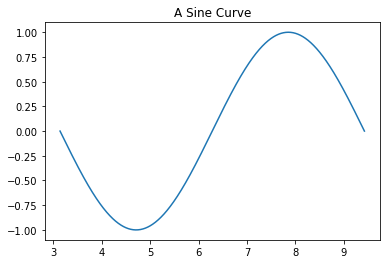

In [26]:
# Creating the matplotlib graph..
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.plot(x, sinx)
ax.set_title('A Sine Curve')

In [27]:
help (tls.mpl_to_plotly)

Help on function mpl_to_plotly in module plotly.tools:

mpl_to_plotly(fig, resize=False, strip_style=False, verbose=False)
    Convert a matplotlib figure to plotly dictionary and send.
    
    All available information about matplotlib visualizations are stored
    within a matplotlib.figure.Figure object. You can create a plot in python
    using matplotlib, store the figure object, and then pass this object to
    the fig_to_plotly function. In the background, mplexporter is used to
    crawl through the mpl figure object for appropriate information. This
    information is then systematically sent to the PlotlyRenderer which
    creates the JSON structure used to make plotly visualizations. Finally,
    these dictionaries are sent to plotly and your browser should open up a
    new tab for viewing! Optionally, if you're working in IPython, you can
    set notebook=True and the PlotlyRenderer will call plotly.iplot instead
    of plotly.plot to have the graph appear directly in the

In [28]:
mpl_fig1

NameError: name 'mpl_fig1' is not defined

In [34]:
plotly_fig = tls.mpl_to_plotly(fig)

In [35]:
py.iplot(plotly_fig, filename='new')